In [65]:
from vectorization import Vectorizer
from glob import glob
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

%matplotlib inline

div = 13
import random
random.seed()
rnd = random.randint(0, div - 1)

['аз', 'ако', 'беше', 'вече', 'време', 'все', 'всички', 'всичко', 'ги', 'го', 'да', 'до', 'дори', 'един', 'една', 'за', 'защото', 'или', 'им', 'има', 'как', 'какво', 'както', 'като', 'което', 'които', 'който', 'която', 'към', 'ли', 'ме', 'ми', 'много', 'може', 'му', 'на', 'не', 'нещо', 'ни', 'но', 'няма', 'обаче', 'от', 'още', 'по', 'преди', 'през', 'при', 'просто', 'пък', 'са', 'само', 'се', 'си', 'след', 'съм', 'тази', 'така', 'те', 'тези', 'това', 'този', 'той', 'трябва', 'тук', 'тя', 'хора', 'че', 'ще']


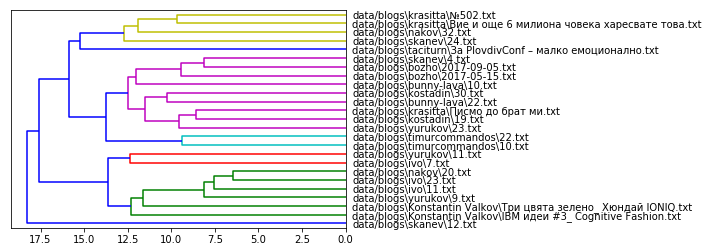

In [66]:
def preprocess(text, max_len=200000):
    return ''.join([c for c in text.lower()
                        if c.isalpha() or c.isspace()])[:max_len]

with open('data/stopwords.txt', 'r', encoding='utf-8') as stopwords_file:
    stopwords_list = preprocess(stopwords_file.read()).split()

filenames, texts = [], []
for i, filename in enumerate(glob('data/blogs/**/*.txt')):
    with open(filename, 'r', encoding='utf-8') as f:
        text = preprocess(f.read())
        
    if i % div == rnd:
        filenames.append(filename)
        texts.append(text)
    
wrappedVectorizer = Vectorizer(mfi=200,
                               vector_space='tf_scaled',
                               ngram_type='words',
                               ngram_size=1,
                               min_df=0.5)
X = wrappedVectorizer.vectorize(texts).toarray()
print(wrappedVectorizer.feature_names)

pd = pdist(X, 'euclidean')
# dm = squareform(pd)
linkage_object = linkage(pd, method='ward')
d = dendrogram(Z=linkage_object, labels=filenames, orientation='left')